# 

From[Visualization and Predicting with our Custom SVM](https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/)

Optimized a step.
Optimized a step.
Optimized a step.
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506
features: [0, 10]
features: [1, 3]
features: [3, 4]
features: [3, 5]
features: [5, 5]
features: [5, 6]
features: [6, -5]
features: [5, 8]


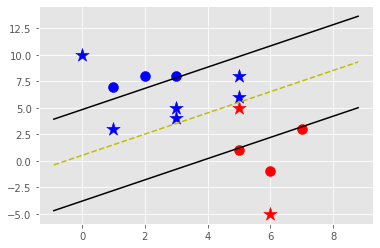

In [12]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]

        
        
        # extremely expensive
        b_range_multiple = 2
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    ##debug
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #print("norms: {}".format(norms))
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        #print('features: {}'.format(features))
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)

svm.visualize()

In [7]:
data_dict

{-1: array([[1, 7],
        [2, 8],
        [3, 8]]),
 1: array([[ 5,  1],
        [ 6, -1],
        [ 7,  3]])}

In [15]:
all_data = []
for yi in data_dict:
    for featureset in data_dict[yi]:
        for feature in featureset:
            all_data.append(feature)
            
print(all_data)

max(all_data)
min(all_data)

[1, 7, 2, 8, 3, 8, 5, 1, 6, -1, 7, 3]


-1

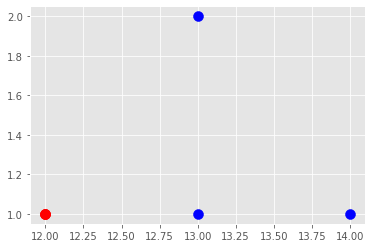

{-1: array([[14,  1],
        [13,  1],
        [13,  2]]),
 1: array([[12,  1],
        [12,  1],
        [12,  1]])}

In [67]:
s1 = np.array([[14,1],[13, 1],[13,2],])
s2 = np.array([[12, 1],[12, 1],[12, 1],])

dd = {-1:s1, 1:s2}

#svm2 = Support_Vector_Machine()
#svm2.fit(dd)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

colors = {1:'r',-1:'b'}

[[ax.scatter(x[0],x[1],s=100,color = colors[i]) for x in dd[i]] for i in dd]

plt.show()
dd

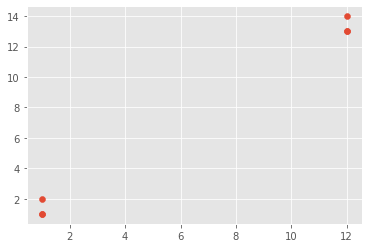

In [10]:
plt.scatter(s2, s1)

[1, 14, 2, 2, 16, 127, 3, 3, 0, 2, 6, 1, 4, 1065]
[1, 13, 2, 2, 11, 100, 3, 3, 0, 1, 4, 1, 3, 1050]
[1, 13, 2, 3, 19, 101, 3, 3, 0, 3, 6, 1, 3, 1185]
[2, 12, 1, 1, 11, 88, 2, 1, 0, 0, 2, 1, 2, 520]
[2, 12, 1, 2, 16, 101, 2, 1, 1, 0, 3, 1, 2, 680]
[2, 13, 1, 2, 17, 100, 2, 1, 1, 1, 6, 1, 2, 450]


[[16, 127], [11, 100], [19, 101]]

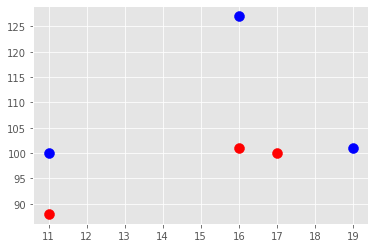

In [70]:
ar1 = ["1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065",
      "1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050", 
      "1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185"]

ar2 = ["2,12.37,.94,1.36,10.6,88,1.98,.57,.28,.42,1.95,1.05,1.82,520",
        "2,12.33,1.1,2.28,16,101,2.05,1.09,.63,.41,3.27,1.25,1.67,680",
        "2,12.64,1.36,2.02,16.8,100,2.02,1.41,.53,.62,5.75,.98,1.59,450"]
        

def ext_feature(ar):
    rv = []
    for line in ar:
        f =  [int(round(float(i),0)) for i in line.split(',')]
        print(f)
        #rv.append(f)
        #test_list  
        #print(f[1:3])
        rv.append(f[4:6])

    return rv
    
s1 = ext_feature(ar1)
s2 = ext_feature(ar2)

dd = {-1:np.array(s1), 1:np.array(s2)}

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

colors = {1:'r',-1:'b'}

[[ax.scatter(x[0],x[1],s=100,color = colors[i]) for x in dd[i]] for i in dd]
s1

Optimized a step.


IndexError: list index out of range

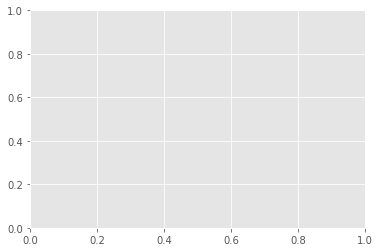

In [69]:
svm = Support_Vector_Machine()
svm.fit(data=dd)



#for p in predict_us:
#    svm.predict(p)

svm.visualize()